In [ ]:
#!/usr/bin/python
%matplotlib inline
import sys
import numpy
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as pyplot
import matplotlib.colors as colours
from matplotlib import cm as CM
import math

In [6]:
data1="met_chi1chi2.csv"
data2="chirest10.c7eq.met.dat"
data3="2d_heatmap"

open met_chi1chi2.csv chirest10.c7eq.met.dat



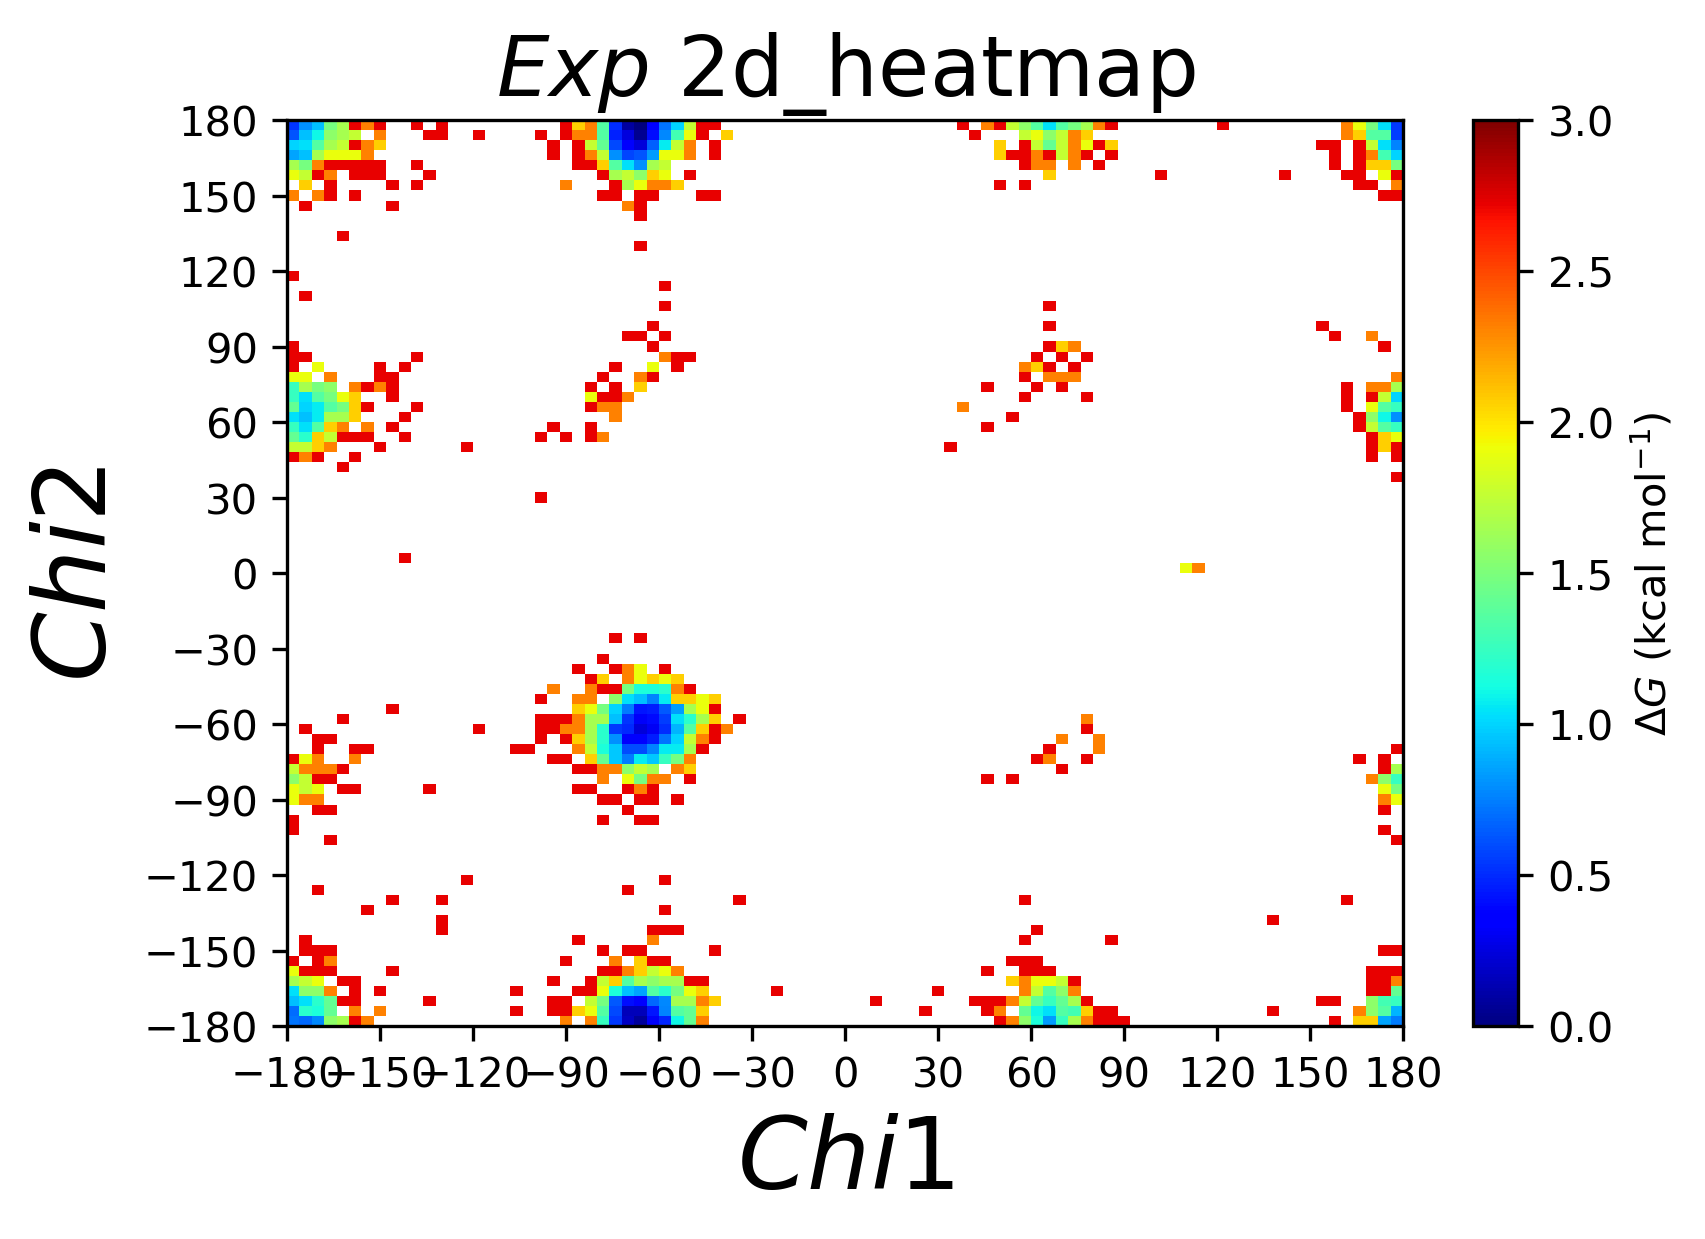

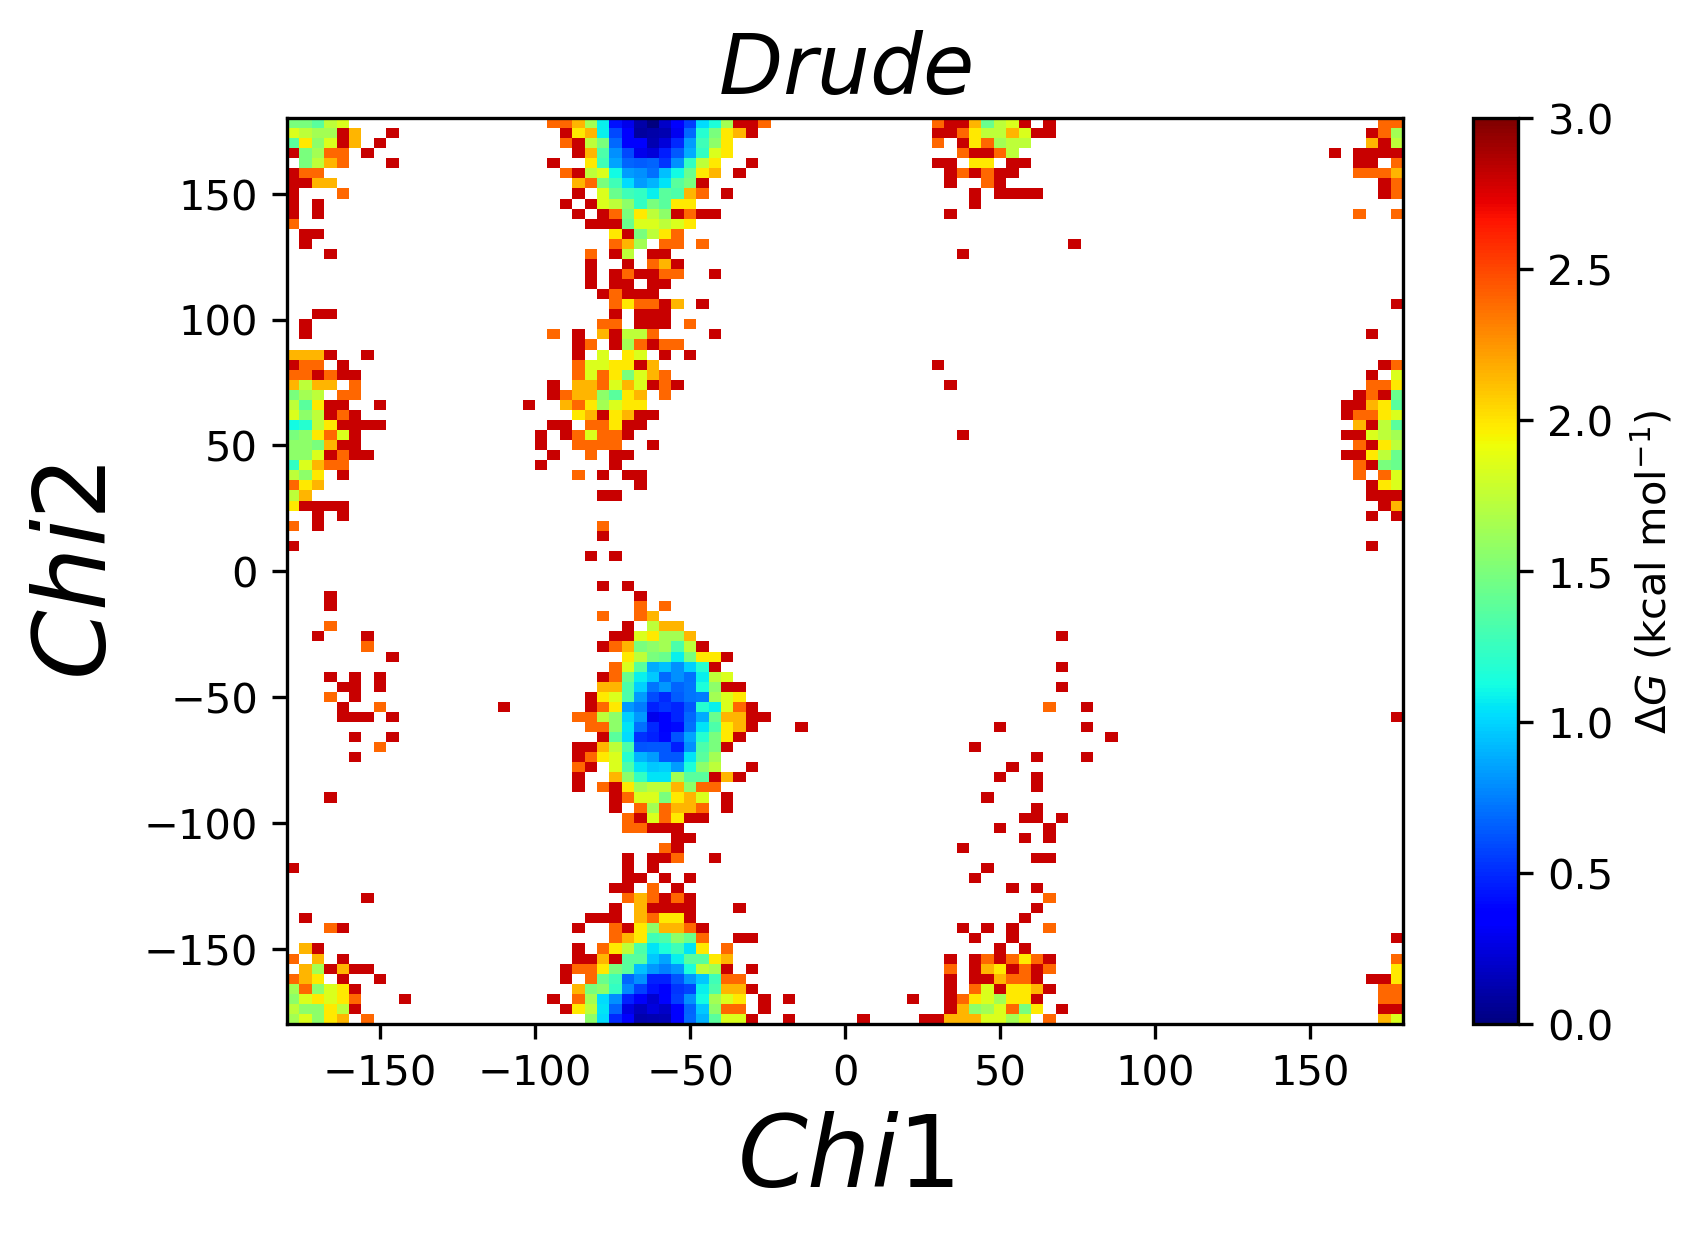

In [7]:
# usage: plot_freeenergy_chi1chi2.py [exp data-2d] [mm data-2d] [output-png] 
# Open file
try:
    print("open " +str(data1)+" "+str(data2)+"\n")
    data_exp = open(data1, 'r')
    data_mm  = open(data2, 'r')
except IOError as exc:
    print("wrong input format")
    sys.exit(1)
# range
xmax = 180 
xmin = -180
ymax = 180
ymin = -180
# ticks
xtick = 30 
ytick = 30 
# label
xlabel = "Chi1"
ylabel = "Chi2"
# resolution
dpi = 300.0
# Free energy calculation 
free_energy = True # True 
# Free energy temperature
temperature = 300

xvalues_exp = []
yvalues_exp = []

xvalues_mm = []
yvalues_mm = []

for line in data_exp:
    input1 = line.split()
    if (len(input1)!=2):
        print("input wrong\n")
        quit()
    else:
        xvalues_exp.append(float(input1[0]))
        yvalues_exp.append(float(input1[1]))
data_exp.close()

for line in data_mm:
    input1 = line.split()
    if (len(input1)!=2):
        print("input wrong\n")
        quit()
    else:
        xvalues_mm.append(float(input1[0]))
        yvalues_mm.append(float(input1[1]))

data_mm.close()

# Plot parameters calculation
#calculate upper and lower ticks of X-axis
x_tick_max = float(xmax/xtick) * xtick

if (xmin/xtick) > int(xmin/xtick):
    x_tick_min = float(int(xmin/xtick+1)) * xtick
else:
    x_tick_min = xmin

# calculate ticks between upper and lower ticks
x_ticks = []
x_ticks.append(x_tick_min)
while (x_tick_min <= x_tick_max):
    x_tick_min = x_tick_min + xtick
    x_ticks.append(x_tick_min)

# feed the ticks value in to plot module
pyplot.xticks(x_ticks)

# Same procedure for Y-axis
y_tick_max = float(ymax/ytick) * ytick
if (ymin/ytick) > int(ymin/ytick):
        y_tick_min = float(int(ymin/ytick+1)) * ytick
else:
    y_tick_min = ymin
y_ticks = []
y_ticks.append(y_tick_min)
while (y_tick_min <= y_tick_max):
        y_tick_min = y_tick_min + ytick
        y_ticks.append(y_tick_min)
pyplot.yticks(y_ticks)

# set bins
x_bins = 90 
y_bins = 90 

# Plot 
normalise = False
h2d_exp, horizedges_exp, vertedges_exp = numpy.histogram2d(yvalues_exp, xvalues_exp,bins=[y_bins,x_bins], range=[[ymin,ymax],[xmin,xmax]], normed=normalise)
extent_exp = [vertedges_exp[0], vertedges_exp[-1], horizedges_exp[0], horizedges_exp[-1]]


# Free energy module for exp
#find the max number for probility converting
max_freq = 0
for i in range(0,y_bins):
    for j in range(0,x_bins):
        if(h2d_exp[i,j] > max_freq):
            max_freq = h2d_exp[i,j]

# delta G = RT*ln(P)
for i in range(0,y_bins):
    for j in range(0,x_bins):
        if (h2d_exp[i,j] > 0): 
            h2d_exp[i,j] = math.log(h2d_exp[i,j]/max_freq) * (8.314/4.184) * temperature * -0.001
        else:
            h2d_exp[i,j] = None

# energy bar caption and range
barLabel = r'$\Delta\mathit{G}$ (kcal mol$^{-1}$)'
pyplot.imshow(h2d_exp, extent=extent_exp, interpolation='nearest',
        origin='lower',aspect='auto',cmap=CM.jet,vmin=0.0,vmax=3.0)

########################################################################################
pyplot.title(r'$Exp$'+' '+str(data3), fontsize=20)
pyplot.xlabel(r'$Chi1$', fontsize=24, fontweight='bold')
pyplot.ylabel(r'$Chi2$', fontsize=24, fontweight='bold')
colourBar = pyplot.colorbar()
colourBar.set_label(barLabel)
defaultres = pyplot.gcf().get_dpi()
pyplot.gcf().set_dpi(dpi)
pyplot.plot()
pyplot.show()
#pyplot.gcf().savefig(data3+'_exp_dg.png', dpi=dpi, bbox_inches='tight')
#===========================================================================

# Free energy module for mm
pyplot.clf()
h2d_mm, horizedges_mm, vertedges_mm = numpy.histogram2d(yvalues_mm, xvalues_mm,bins=[y_bins,x_bins], range=[[ymin,ymax],[xmin,xmax]], normed=normalise)
extent_mm = [vertedges_mm[0], vertedges_mm[-1], horizedges_mm[0], horizedges_mm[-1]]


#find the max number for probility converting
max_freq = 0
for i in range(0,y_bins):
    for j in range(0,x_bins):
        if(h2d_mm[i,j] > max_freq):
            max_freq = h2d_mm[i,j]

# delta G = RT*ln(P)
for i in range(0,y_bins):
    for j in range(0,x_bins):
        if (h2d_mm[i,j] > 0):
            h2d_mm[i,j] = math.log(h2d_mm[i,j]/max_freq) * (8.314/4.184) * temperature * -0.001
        else:
            h2d_mm[i,j] = None

## energy bar caption and range
barLabel = r'$\Delta\mathit{G}$ (kcal mol$^{-1}$)'
pyplot.imshow(h2d_mm, extent=extent_mm, interpolation='nearest',
        origin='lower',aspect='auto',cmap=CM.jet,vmin=0.0,vmax=3.0)

## Minor plot setting 
pyplot.title(r'$Drude$', fontsize=20)
pyplot.xlabel(r'$Chi1$', fontsize=24, fontweight='bold')
pyplot.ylabel(r'$Chi2$', fontsize=24, fontweight='bold')
colourBar = pyplot.colorbar()
colourBar.set_label(barLabel)
defaultres = pyplot.gcf().get_dpi()
pyplot.gcf().set_dpi(dpi)
pyplot.show(block=False)
#pyplot.gcf().savefig(data3+'_mm_dg.png', dpi=dpi, bbox_inches='tight')


